### 계층 군집: 거리 행렬 계산

In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [2]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [3]:
from scipy.cluster.hierarchy import linkage

help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [4]:
# 사용방법 1
row_clusters = linkage(pdist(df, metric='euclidean'),
                      method='complete')

row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [5]:
# 사용방법 2
row_clusters = linkage(df.values,
                      method='complete',
                      metric='euclidean')

row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

### 계층 군집: 거리 행렬 기반 병합 군집 수행

In [6]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

pd.DataFrame(row_clusters,
             columns=['row label 1', 
                      'row label 2',
                      'distance', 
                      'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


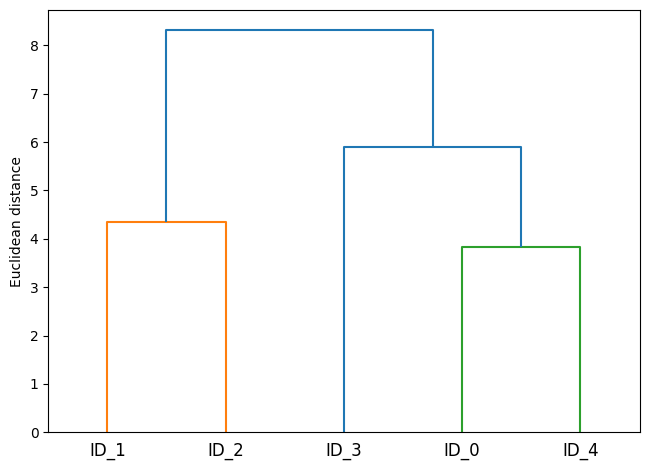

In [7]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 검은색 덴드로그램 만들기 (1/2 부분만)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### 계층 군집: 히트맵과 덴드로그램 연결

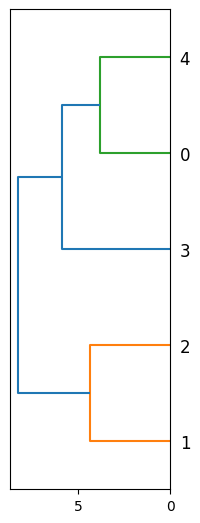

In [8]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
# 노트: matplotlib < v1.5.1일 때는 use orientation='right'를 사용하세요

C:\Users\Humane1\AppData\Local\Temp\ipykernel_10944\1872671176.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\Humane1\AppData\Local\Temp\ipykernel_10944\1872671176.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


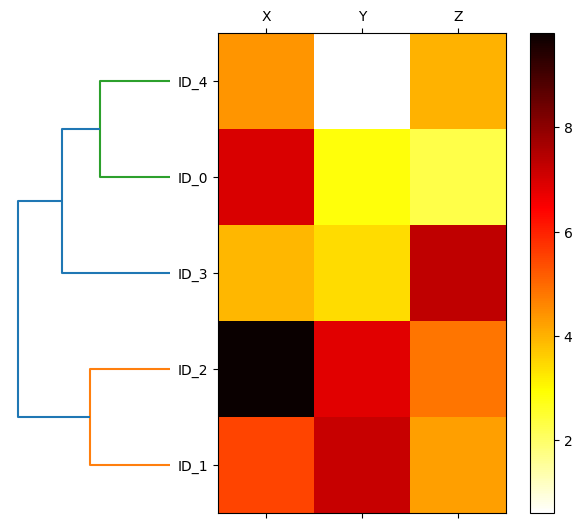

In [9]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
# 노트: matplotlib < v1.5.1일 때는 use orientation='right'를 사용하세요

# 군집에 맞게 데이터를 재정렬합니다.
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-위치, y-위치, 너비, 높이
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])

# 덴드로그램의 축을 제거합니다.
for i in axd.spines.values():
    i.set_visible(False)

# 히트맵을 출력합니다.
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

### 계층 군집: 사이킷런 구현

In [10]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [1 0 0 2 1]


C:\Users\Humane1\anaconda3\envs\2023-DS-A\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [11]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [0 1 1 0 0]


C:\Users\Humane1\anaconda3\envs\2023-DS-A\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### DBSCAN: 실습

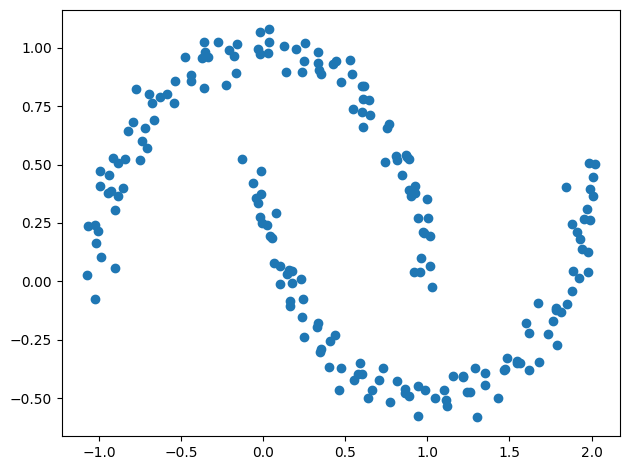

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, 
                  noise=0.05, 
                  random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

C:\Users\Humane1\anaconda3\envs\2023-DS-A\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Humane1\anaconda3\envs\2023-DS-A\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


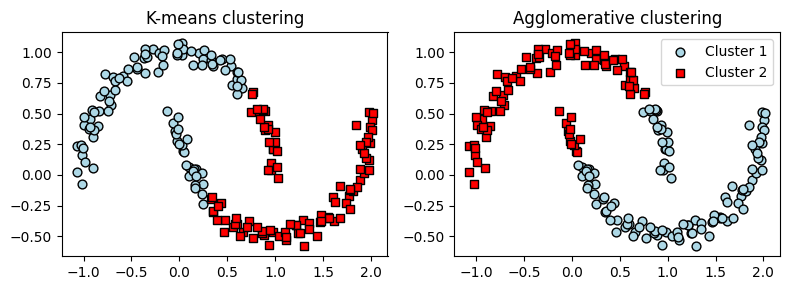

In [13]:
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, 
            random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], 
            X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', 
            marker='o', 
            s=40, 
            label='cluster 1')

ax1.scatter(X[y_km == 1, 0], 
            X[y_km == 1, 1],
            edgecolor='black',
            c='red', 
            marker='s', 
            s=40, 
            label='cluster 2')

ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1], 
            c='lightblue',
            edgecolor='black',
            marker='o', 
            s=40, 
            label='Cluster 1')

ax2.scatter(X[y_ac == 1, 0], 
            X[y_ac == 1, 1], 
            c='red',
            edgecolor='black',
            marker='s', 
            s=40, 
            label='Cluster 2')

ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

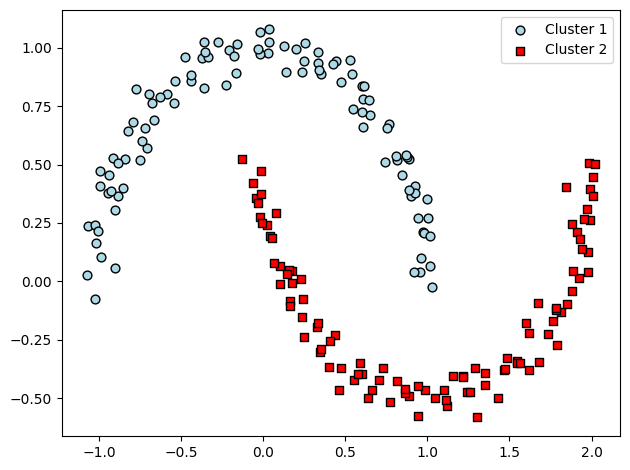

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
            min_samples=5, 
            metric='euclidean')

y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], 
            X[y_db == 0, 1],
            c='lightblue',
            marker='o', 
            s=40,
            edgecolor='black', 
            label='Cluster 1')

plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c='red', 
            marker='s', 
            s=40,
            edgecolor='black', 
            label='Cluster 2')

plt.legend()
plt.tight_layout()
plt.show()